In [1]:
import sys
sys.path.append('..')
from src.pomdp import *

import numpy as np

# POMDP Toy Problem

Symmetric 3 state, 2 action model

## Model definition

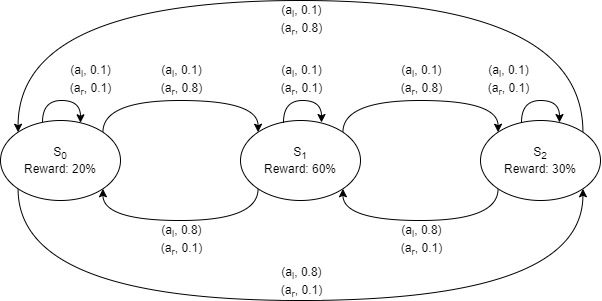

In [2]:
ACTION_COUNT = 2
STATE_COUNT = 3

In [3]:
# 80% chance of success, 10% land in other tile, 10% stay in place
MOVE_RND = 0.8
def transition_function(s, a, s_p):
    s_a = (s + (-1 if a == 0 else 1)) % STATE_COUNT # Left and right movement
    s_a = s_a if s_a >= 0 else s_a + STATE_COUNT
    
    if s_a == s_p:
        return MOVE_RND
    else:
        return round((1.0 - MOVE_RND) / (STATE_COUNT - 1), 1)

# Setup table to speedup computation
transition_table = np.zeros(shape=(STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            transition_table[s,a,s_p] = transition_function(s,a,s_p)

# Test with action 0, ie: LEFT
transition_table[:,0,:]

array([[0.1, 0.1, 0.8],
       [0.8, 0.1, 0.1],
       [0.1, 0.8, 0.1]])

In [5]:
OBS_RND = 0.7 # 70% of observation success

observation_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT))
for s_p in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for o in range(STATE_COUNT):
            observation_table[s_p, a, o] = OBS_RND if s_p == o else (1.0 - OBS_RND) / (STATE_COUNT - 1)
          
observation_table[:,0,:]

array([[0.7 , 0.15, 0.15],
       [0.15, 0.7 , 0.15],
       [0.15, 0.15, 0.7 ]])

In [6]:
REWARD_PROBS = [0.2, 0.6, 0.3]

reward_table = np.zeros((STATE_COUNT, ACTION_COUNT, STATE_COUNT, STATE_COUNT))
for s in range(STATE_COUNT):
    for a in range(ACTION_COUNT):
        for s_p in range(STATE_COUNT):
            reward_table[s,a,s_p,:] = REWARD_PROBS[s_p]
        
reward_table

array([[[[0.2, 0.2, 0.2],
         [0.6, 0.6, 0.6],
         [0.3, 0.3, 0.3]],

        [[0.2, 0.2, 0.2],
         [0.6, 0.6, 0.6],
         [0.3, 0.3, 0.3]]],


       [[[0.2, 0.2, 0.2],
         [0.6, 0.6, 0.6],
         [0.3, 0.3, 0.3]],

        [[0.2, 0.2, 0.2],
         [0.6, 0.6, 0.6],
         [0.3, 0.3, 0.3]]],


       [[[0.2, 0.2, 0.2],
         [0.6, 0.6, 0.6],
         [0.3, 0.3, 0.3]],

        [[0.2, 0.2, 0.2],
         [0.6, 0.6, 0.6],
         [0.3, 0.3, 0.3]]]])

In [7]:
states = ['s0','s1','s2']
actions = ['left', 'right']
observations = ['s0', 's1', 's2']

model = Model(states, actions, observations, transition_table, reward_table, observation_table, probabilistic_rewards=True)

## Solving

In [8]:
solver = PBVI_Solver()

In [9]:
value_function, solve_history = solver.solve(model,8,4)

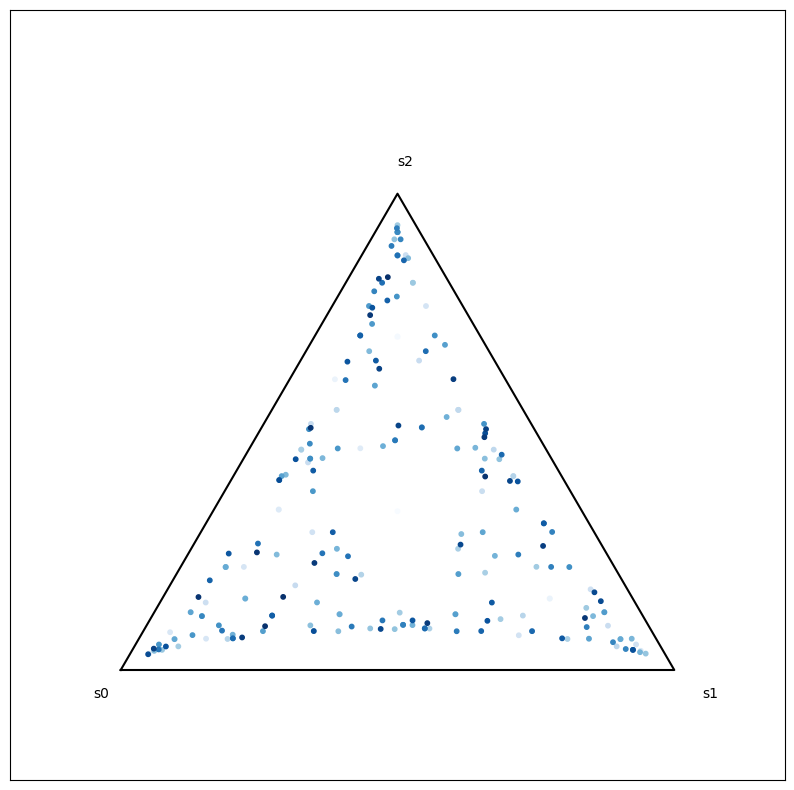

In [10]:
solve_history.plot_belief_set(10)

In [11]:
value_function

[AlphaVector([3.86415193, 3.81575406, 4.01725686]),
 AlphaVector([4.0227676 , 3.85595645, 3.81187511]),
 AlphaVector([3.85595645, 3.81187511, 4.0227676 ]),
 AlphaVector([4.01818242, 3.86397606, 3.8131568 ]),
 AlphaVector([3.97269291, 3.89374731, 3.7225982 ]),
 AlphaVector([4.0228177 , 3.85591741, 3.81153721]),
 AlphaVector([3.8559714 , 3.81405645, 4.02219167]),
 AlphaVector([3.98540848, 3.88195619, 3.80090358]),
 AlphaVector([3.86163318, 3.81636018, 4.01743172]),
 AlphaVector([4.01723858, 3.8643793 , 3.81545824]),
 AlphaVector([3.86385639, 3.81576964, 4.0174514 ]),
 AlphaVector([3.85596655, 3.81408865, 4.02217662]),
 AlphaVector([3.86426497, 3.81316762, 4.01796243]),
 AlphaVector([3.85592201, 3.81146946, 4.02282066]),
 AlphaVector([3.85616864, 3.81160235, 4.02276006]),
 AlphaVector([4.02217662, 3.85596655, 3.81408865]),
 AlphaVector([3.85611674, 3.81127723, 4.02281233]),
 AlphaVector([4.01796243, 3.86426497, 3.81316762]),
 AlphaVector([3.85597266, 3.81408869, 4.0221748 ]),
 AlphaVector

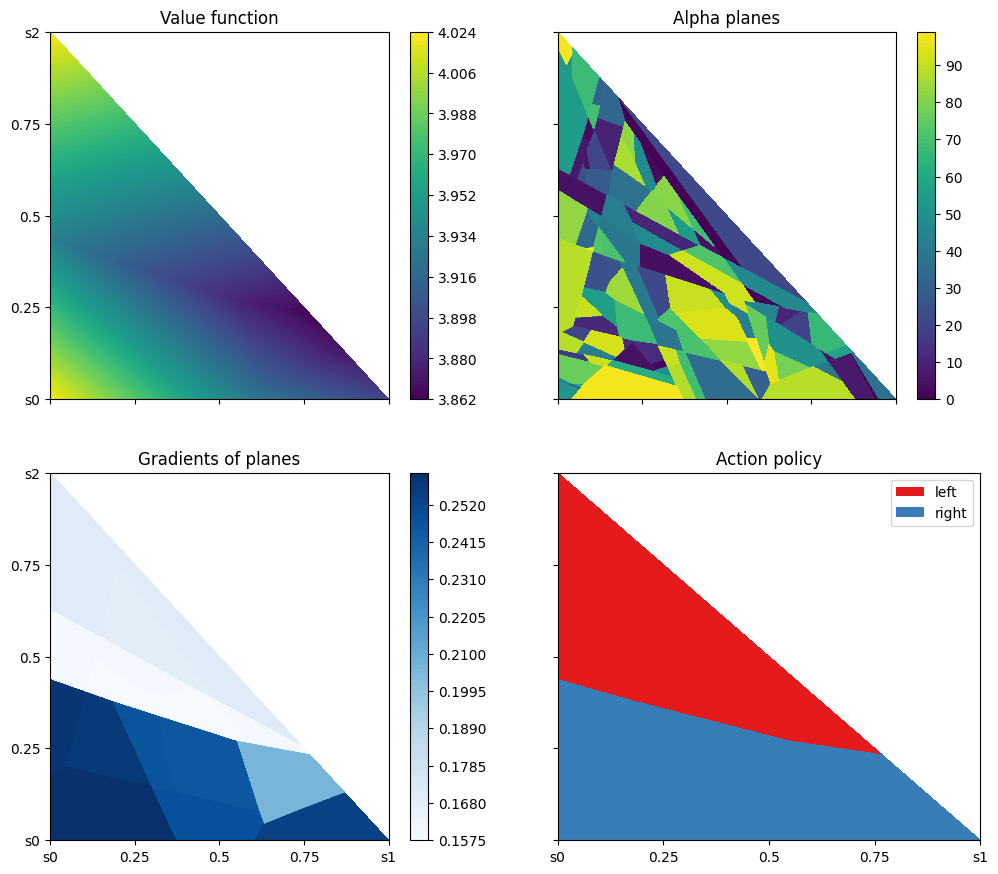

In [12]:
solve_history.plot_solution(3, plot_belief=False)

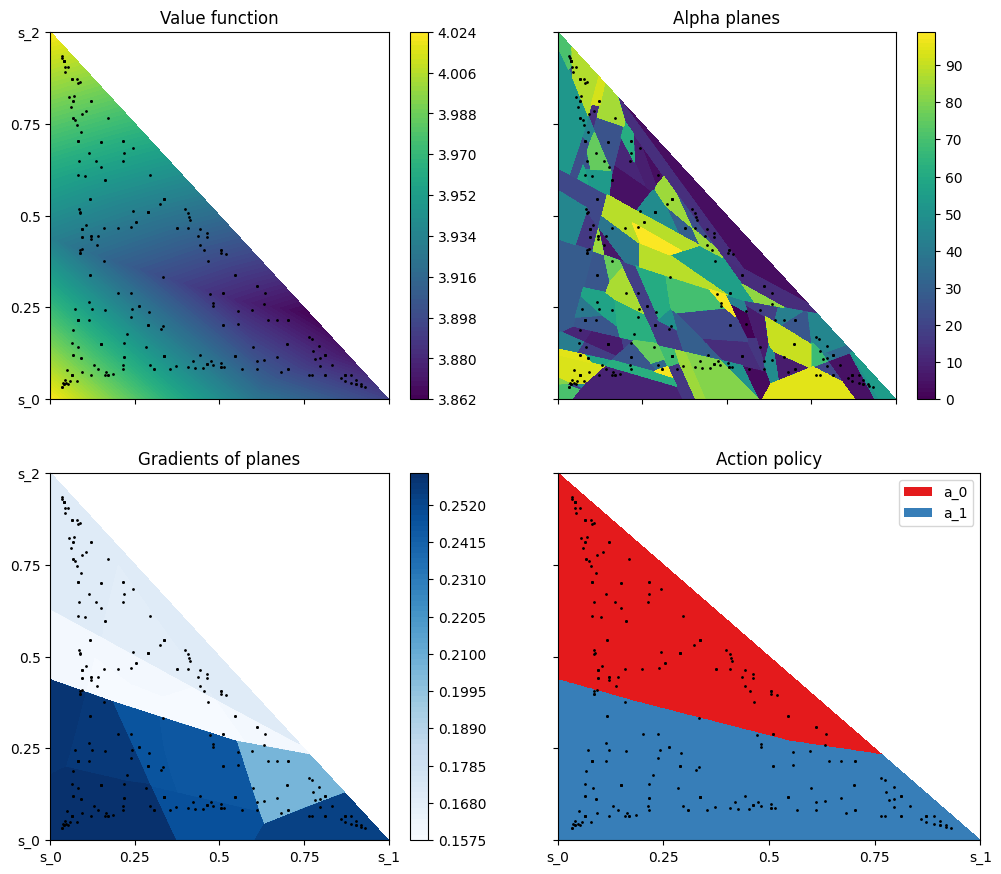

In [13]:
value_function.plot(3, belief_set=solve_history.explored_beliefs)